<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Sentiment%20Analysis%20BERT-NN%20(Livin'%20by%20Mandiri).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study : Sentiment Analysis review Livin' by Mandiri

# Preprocessing Data

## Load & EDA dataset

In [ ]:
# Load Dataset dan file yang diperlukan
import pandas as pd
import numpy as np
import gdown

!gdown --id 16ih0GscT3Bhc7VJ1Xdx5JsaxFhFWJMAm #Data 9k
!gdown --id 1pV3yQDD41NOuDekbALTYTU9h_g4K4Dlx #w2v-model.bin
!gdown --id 1LaseazTXg9qqGnsJhi9DcI_ArHMbf7E- #wv.vectors.npy
!gdown --id 1uKsWCk53ESOOySIQsjdKuOiF9RIkRTSD #trainables.syn1neg.npy
!gdown --id 1mWhFm0x5jhioePeKy8ye0ta0VkkzDmQp #fcmeans

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16ih0GscT3Bhc7VJ1Xdx5JsaxFhFWJMAm
To: /content/ReviewMandiri9k.csv
100% 5.34M/5.34M [00:00<00:00, 152MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pV3yQDD41NOuDekbALTYTU9h_g4K4Dlx
To: /content/w2v-model.bin
100% 5.26M/5.26M [00:00<00:00, 74.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (ori

In [ ]:
data = pd.read_csv('ReviewMandiri9k.csv', index_col=False)

In [ ]:
df = data[['userName', 'content', 'score']]
df['content'] = df['content'].str.lower()
df.rename(columns= {'content':'text'}, inplace=True)

<ipython-input-3-cbcd5d65c5aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()
<ipython-input-3-cbcd5d65c5aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {'content':'text'}, inplace=True)


In [ ]:
df.head()

,userName,text,score
0,yghnナンダ,tingkatkan terus mandiri semangat,5
1,Roji Agara Oji,sangat puas,4
2,Drg. Datu Permata,till now the only digital wallet that can be r...,3
3,ARC Kun,"kak, ini saya punya kendala. kendala saya adal...",4
4,Yanti Choesin Zen,ok ..,4


## Labeling Manual (Ga perlu di-Run)

In [ ]:
df['text'].str.split().apply(len)

0        4
1        2
2       56
3       64
4        2
        ..
9045    31
9046    19
9047    23
9048     2
9049    28
Name: text, Length: 9050, dtype: int64

In [ ]:
df['length'] = df['text'].str.split().apply(len)

<ipython-input-6-7ff36d3d535d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].str.split().apply(len)


In [ ]:
dffil = df[(df['length'] > 3) & (df['length'] <= 10)]

In [ ]:
dffil.shape[0]

2226

In [ ]:
dffil = dffil.sort_values(by='length')

In [ ]:
dffil[100:150]

,userName,text,score,length
1254,agus septareza,banyak yang harus diperbaiki,2,4
1248,Hani Laksono,very easy to use!,5,4
6256,meesbah hidayat,semakin baik. memudahkan transaksi,4,4
1243,Novita Perwira,males suka minta update,3,4
6084,Donato Sandhi Kurnia,aplikasi tidak dapat dibuka,1,4
6086,nur firdaus,reliable and user friendly,5,4
6093,Dian Afandi,kembalikan versi lama aja,1,4
6102,Dyah Ayu Widyastuti,love this new apps.,5,4
6115,Arief_afandi,sangat bagus .sangt memudahkan.,5,4
6116,Sadan Atlan,sering update perbaiki dong,2,4


In [ ]:
dfsample = dffil.sample(n=1000, random_state=100502)

In [ ]:
dfsample.head(10)

,userName,text,score,length
3058,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6
6228,Windy Chintia,"capek update terus, hape saya penuh :(",3,7
1072,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7
7523,Luqman Hakim Zainuri,easy transfer & payment,5,4
1728,Abdul Rajab,aplkasinya minta di update terus,4,5
4745,Potina Silalai,krn bisa membantu transaksi secara mudah dan c...,4,9
7629,Jentu Priyono,cukup praktis dan aman,4,4
4732,Muhammad Hazmi Masruri,tidak bisa cetak rekening koran,1,5
2210,Sabila Rasyad,"the worst one, not intuitive and user friendly",1,8
5287,Sidharta F Rasidi,bisa mantap kalau ditambahkan kalkulator kurs ...,3,7


In [ ]:
df1manual = dfsample[:250]
df2manual = dfsample[250:500]
df3manual = dfsample[500:750]
df4manual = dfsample[750:]

In [ ]:
print("Shape df1manual:", df1manual.shape,
      "\nShape df2manual:", df2manual.shape,
      "\nShape df3manual:", df3manual.shape,
      "\nShape df4manual:", df4manual.shape)

Shape df1manual: (250, 4) 
Shape df2manual: (250, 4) 
Shape df3manual: (250, 4) 
Shape df4manual: (250, 4)


In [ ]:
dfsample[499:501]

,userName,text,score,length
7891,Cahya (Cahya),"aplikasi tiba-tiba tidak bisa di buka, padahal...",1,10
2468,Calvin Febriyanto,sering crash tiba-tiba dan tidak bisa dibuka. ...,3,10


In [ ]:
df2manual.tail(1)

,userName,text,score,length
7891,Cahya (Cahya),"aplikasi tiba-tiba tidak bisa di buka, padahal...",1,10


In [ ]:
df3manual.head(1)

,userName,text,score,length
2468,Calvin Febriyanto,sering crash tiba-tiba dan tidak bisa dibuka. ...,3,10


In [ ]:
# Save untuk diberikan label manual
#df1manual.to_csv("manual1.csv", index = False)
#df2manual.to_csv("manual2.csv", index = False)
#df3manual.to_csv("manual3.csv", index = False)
#df4manual.to_csv("manual4.csv", index = False)

In [ ]:
# Hapus baris yang sudah diambil dari dffil
dffil1 = dffil.drop(dfsample.index)

# Ambil sampel kedua dari baris yang tersisa di dffil
dfsample1 = dffil1.sample(n=1000, random_state=100502)

In [ ]:
dfsample1.head()

,userName,text,score,length
6086,nur firdaus,reliable and user friendly,5,4
6522,Rahmah Rahmah,why my face recognition never succeeded... why...,2,7
402,Hendy siswanto (h3ndy),each week updating for nothing .. good job,2,8
4440,Iskandar Dzulkarnaen,"busuk, susah utk transfer",1,4
7772,Ginandjar Rahardja,easy and friendly to use,5,5


In [ ]:
dfsample1.to_csv("labelmanual5.csv", index = False)

In [ ]:
dfsampleall = pd.concat([dfsample, dfsample1])

In [ ]:
dfsampleall

,userName,text,score,length
3058,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6
6228,Windy Chintia,"capek update terus, hape saya penuh :(",3,7
1072,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7
7523,Luqman Hakim Zainuri,easy transfer & payment,5,4
1728,Abdul Rajab,aplkasinya minta di update terus,4,5
...,...,...,...,...
6249,Tangguh Birowo,"kenapa di hubungkan ke linkaja, malah gabisa ya?",4,8
6483,Jerry Tobing,input password tidak responsif.,2,4
3113,jkyl3 j,app not useable for 32-bit phone,2,6
3524,Anugrah Teguh,"good ui ux, easy to use. super app!",5,8


In [ ]:
dffilt = df[(df['length'] > 10) & (df['length'] <= 15)]
dffilt = dffilt.sort_values(by='length')
dffilt.shape

(1100, 4)

In [ ]:
dffilts = dffilt.sample(n=1000, random_state=100502)

In [ ]:
dfs1 = dffilts[:250]
dfs2 = dffilts[250:500]
dfs3 = dffilts[500:750]
dfs4 = dffilts[750:]

In [ ]:
dfs1.to_csv("dfs1.csv", index = False)
dfs2.to_csv("dfs2.csv", index = False)
dfs3.to_csv("dfs3.csv", index = False)
dfs4.to_csv("dfs4.csv", index = False)

In [ ]:
dfmanlabel = pd.concat([dfsampleall, dffilts])

In [ ]:
dfmanlabel.shape

(3000, 4)

## Preprocess Label Manual

In [ ]:
!gdown 1pZbEwNoUZ0A7Qq7B9kPJJuHOUoHSqBvs -q #LabelManual1
!gdown 1jUgPxXk_zrYCLvhOP_tUixpolvdx94eb -q #LabelManual2
!gdown 11U60zYdL1VtSRnROD4Q1x1WwAHUE-73H -q #LabelManual3
!gdown 1I3DaDzYgbAGGnXGmZTq3BKpkZ2Q17xm- -q #LabelManual4
!gdown 1sFqH9XCIe1FzOfvLDkNHxlBwJtSlIMdi -q #LabelManual5
!gdown 1C0MD7s8-keBumEq1P1125RnYNBybV3Yt -q #LabelManual6
!gdown 1-mR65hBbxorS-AdUMlyGZgdrKHsXw2LG -q #LabelManual7
!gdown 1vThK7E_2mPYZJME-r3vNsVgzIGI54djt -q #LabelManual8
!gdown 1iZayogQjFyPBgmTzc74spyJltnXaoN0m -q #LabelManual9
!gdown 1zEqoBTzJ5XOTqWMvgtGlwH-V7kljZcAF -q #emoji
!gdown 1z8WPsHpf4lzP1a-OSckYxX5yAPB2U5Uw -q #slangindo
!gdown 1FOw-Vi0vHXlFlcGqwCQVqBTHALDqztYF -q #slangindo+

In [ ]:
man1 = pd.read_csv('manual1label.csv')
man2 = pd.read_csv('manual2label.csv')
man3 = pd.read_csv('manual3label.csv')
man4 = pd.read_csv('manual4label.csv')
man5 = pd.read_csv('manual5label.csv')
man6 = pd.read_csv('dfs1label.csv')
man7 = pd.read_csv('dfs2label.csv')
man8 = pd.read_csv('dfs3label.csv')
man9 = pd.read_csv('dfs4label.csv')

In [ ]:
manual = pd.concat([man1, man2, man3, man4, man5, man6, man7, man8, man9], ignore_index=True)
manual.shape

(3000, 5)

In [ ]:
manual.head()

,userName,text,score,length,label
0,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6,1
1,Windy Chintia,"capek update terus, hape saya penuh :(",3,7,1
2,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7,1
3,Luqman Hakim Zainuri,easy transfer & payment,5,4,3
4,Abdul Rajab,aplkasinya minta di update terus,4,5,1


In [ ]:
# Mengganti nilai 1, 2, 3 menjadi 'NEGATIVE', 'NEUTRAL', 'POSITIVE'
manual['label'] = manual['label'].replace({1: 'NEGATIVE', 2: 'NEUTRAL', 3: 'POSITIVE'})

In [ ]:
manual.head()

,userName,text,score,length,label
0,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6,NEGATIVE
1,Windy Chintia,"capek update terus, hape saya penuh :(",3,7,NEGATIVE
2,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7,NEGATIVE
3,Luqman Hakim Zainuri,easy transfer & payment,5,4,POSITIVE
4,Abdul Rajab,aplkasinya minta di update terus,4,5,NEGATIVE


In [ ]:
manual.label.value_counts()

label
NEGATIVE    1813
POSITIVE     845
NEUTRAL      342
Name: count, dtype: int64

In [ ]:
manual

,userName,text,score,length,label
0,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6,NEGATIVE
1,Windy Chintia,"capek update terus, hape saya penuh :(",3,7,NEGATIVE
2,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7,NEGATIVE
3,Luqman Hakim Zainuri,easy transfer & payment,5,4,POSITIVE
4,Abdul Rajab,aplkasinya minta di update terus,4,5,NEGATIVE
...,...,...,...,...,...
2995,Liza Anggraeni,"gabisa login dah berulang"" dicoba dah di unins...",2,12,NEGATIVE
2996,tuyul on “tuyul on” themix,aneh banget nih knpa kok apk tidak bisa di gun...,2,15,NEGATIVE
2997,Galexz,transaksi di jam malam sering gangguan/ eror.....,1,15,NEGATIVE
2998,anang se,i prefer blue version simple and easy to used....,4,15,NEUTRAL


In [ ]:
dfmanlabel

,userName,text,score,length
3058,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6
6228,Windy Chintia,"capek update terus, hape saya penuh :(",3,7
1072,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7
7523,Luqman Hakim Zainuri,easy transfer & payment,5,4
1728,Abdul Rajab,aplkasinya minta di update terus,4,5
...,...,...,...,...
870,Citra,pas di refresh muncul pinjaman giliran setelah...,4,12
4863,Edy ide,sebaiknya untuk paylatter di buat jadi satu sa...,4,15
361,Val teh mord,maintenance-nya lain kali jangan sampe seharia...,4,15
2097,Andri Rahman,tolong dong menu pay leternya dimunculkan di l...,4,15


In [ ]:
manualfil = manual[manual['label'] != "NEUTRAL"]

In [ ]:
manualfil.shape

(2658, 5)

In [ ]:
manualfil.head()

,userName,text,score,length,label
0,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6,NEGATIVE
1,Windy Chintia,"capek update terus, hape saya penuh :(",3,7,NEGATIVE
2,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7,NEGATIVE
3,Luqman Hakim Zainuri,easy transfer & payment,5,4,POSITIVE
4,Abdul Rajab,aplkasinya minta di update terus,4,5,NEGATIVE


In [ ]:
manualfil['label'] = manualfil['label'].replace({'NEGATIVE' : 0, 'POSITIVE' : 1})

<ipython-input-43-8af18c286534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manualfil['label'] = manualfil['label'].replace({'NEGATIVE' : 0, 'POSITIVE' : 1})


In [ ]:
manualfil.head()

,userName,text,score,length,label
0,Fery Setyawan,"erorrrr, dan tidak bisa di buka",1,6,0
1,Windy Chintia,"capek update terus, hape saya penuh :(",3,7,0
2,D Aryand 31,ini kenapa mandiri tdk bisa di buka,1,7,0
3,Luqman Hakim Zainuri,easy transfer & payment,5,4,1
4,Abdul Rajab,aplkasinya minta di update terus,4,5,0


In [ ]:
slang = pd.read_csv("slangindo.csv")

In [ ]:
slang.head()

,aamiin,amin
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [ ]:
slang.rename(columns={'aamiin': 'slang'}, inplace=True)
slang.rename(columns={'amin' : 'baku'}, inplace=True)

In [ ]:
slang.head()

,slang,amin
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [ ]:
# Fungsi untuk membuat kamus dari DataFrame
def dicts(df):
    return dict(zip(df.iloc[:, 0], df.iloc[:, 1]))  # Menggunakan .iloc untuk mengakses kolom berdasarkan indeks numerik

# Menerapkan kamus pada data review
def changes(review, dicts):
    key = dicts.keys()
    change = []
    for kata in review.split():
        if kata in key:
            change.append(dicts[kata])
        else:
            change.append(kata)
    return ' '.join(change).replace("  ", " ")

# Contoh data review
review = "adek sya suka maen aer ga mau mandi"

# Membuat kamus
kamus = dicts(slang)

# Mengganti kata-kata sehari-hari dengan kata baku dalam data review
review_terganti = changes(review, kamus)

print("Review asli:", review)
print("Review setelah diganti:", review_terganti)

Review asli: adek sya suka maen aer ga mau mandi
Review setelah diganti: adik saya suka main air tidak mau mandi


In [ ]:
print(kamus)

{'adek': 'adik ', 'adlh': 'adalah ', 'aer': 'air ', 'aiskrim': 'es krim ', 'aj': 'saja ', 'aja': 'saja ', 'ajah': 'saja ', 'ajalah': 'saja ', 'aje': 'saja ', 'ajh': 'saja', 'ajj': 'saja', 'aku': 'saya', 'ak': 'saya ', 'akoh': 'saya', 'akutu': 'saya', 'aq': 'saya', 'alesan': 'alasan ', 'ama': 'sama ', 'amaca': 'ah masa', 'amuh': 'kamu', 'ancur': 'hancur ', 'ane': 'saya ', 'anget': 'hangat ', 'anjeng': 'anjing ', 'ank': 'anak ', 'apah': 'apa ', 'aph': 'apa', 'apo': 'apa ', 'apose': 'apa', 'apz': 'apa', 'artine': 'artinya ', 'asek': 'asik ', 'ati2': 'hati-hati ', 'atit': 'sakit ', 'atu': 'satu ', 'atw': 'atau ', 'ayang': 'sayang ', 'ayuk': 'ayo ', 'babang': 'abang', 'bae': 'baik ', 'bais': 'habis', 'bakalan': 'akan ', 'bales': 'balas ', 'bandingin': 'bandingkan ', 'banget': 'sekali ', 'bangett': 'sangat ', 'banyakin': 'perbanyak ', 'barengan': 'bersamaan ', 'baryaw': 'sabar ya', 'baso': 'bakso ', 'bay': 'selamat tinggal', 'bbrp': 'beberapa ', 'bc': 'baca ', 'bcs': 'bisa ', 'bct': 'bicara 

In [ ]:
file_path = "slangindo1.txt"  # Ganti dengan nama file yang diunggah
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

{"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": 

In [ ]:
import json
# Parse string JSON menjadi dictionary
slangdict = json.loads(content)

In [ ]:
print(slangdict)

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [ ]:
slangdict.update(kamus)

In [ ]:
len(slangdict)

1986

In [ ]:
manualfil['cleantext'] = manualfil['text'].apply(lambda x: changes(x, slangdict))

<ipython-input-56-33410207be27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manualfil['cleantext'] = manualfil['text'].apply(lambda x: changes(x, slangdict))


# BERT-NN

## Training Model Bert

In [ ]:
import torch
import torch.nn as nn
#device = torch.device("cuda")
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
bert = AutoModel.from_pretrained('bert-base-multilingual-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [ ]:
#Cek apakah model membaca emoji
s =" 😃 hello how are you"
tokenizer.tokenize(s)

['[UNK]', 'hello', 'how', 'are', 'you']

In [ ]:
# Menambahkan emoji ke token model
emo = pd.read_csv("emojis.csv")

In [ ]:
emo.head()

,Hex,Rank,Emoji,Year,Category,Subcategory,Name
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face


In [ ]:
emot = list(emo.Emoji)
emot[1:5]

['❤️', '🤣', '👍', '😭']

In [ ]:
num_added_tokens = tokenizer.add_tokens(emot)
print("Added", num_added_tokens, "tokens")

Added 1549 tokens


In [ ]:
# Perbarui matriks embedding
bert.resize_token_embeddings(len(tokenizer))

Embedding(107428, 768)

In [ ]:
#Cek apakah model membaca emoji
s =" 😃 hello how are you my love ❤️🧡💛💚💙💜"
tokenizer.tokenize(s)

['😃',
 'hello',
 'how',
 'are',
 'you',
 'my',
 'love',
 '❤️',
 '🧡',
 '💛',
 '💚',
 '💙',
 '💜']

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(manualfil['cleantext'], manualfil['label'],
																	random_state = 2024,
																	test_size = 0.2,
																	stratify = manualfil['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
																random_state = 2024,
																test_size = 0.5,
																stratify = temp_labels)

(array([492., 234., 188., 361., 178., 141., 297., 112., 116.,   7.]),
 array([ 4. ,  5.3,  6.6,  7.9,  9.2, 10.5, 11.8, 13.1, 14.4, 15.7, 17. ]),
 <BarContainer object of 10 artists>)

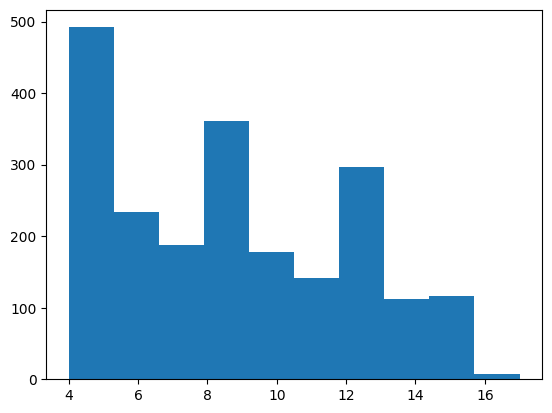

In [ ]:
import matplotlib.pyplot as plt
train_lens = [len(i.split()) for i in train_text]
plt.hist(train_lens)

In [ ]:
pad_len = 10

In [ ]:
# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
	train_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_val = tokenizer.batch_encode_plus(
	val_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_test = tokenizer.batch_encode_plus(
	test_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 64

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# Freeze the pretrained layers
for param in bert.parameters():
    param.requires_grad = False

# Defining new layers
class BERT_architecture(nn.Module):

    def __init__(self, bert):
        super(BERT_architecture, self).__init__()

        self.bert = bert

        # Dropout layer
        self.dropout = nn.Dropout(0.2)

        # ReLU activation function
        self.relu = nn.ReLU()

        # Dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # Dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # Softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    # Define the forward pass
    def forward(self, sent_id, mask):
        # Pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # Output layer
        x = self.fc2(x)

        # Apply softmax activation
        x = self.softmax(x)

        return x

In [ ]:
# Freeze the pretrained layers
for param in bert.parameters():
    param.requires_grad = False

class BERT_architecture(nn.Module):
    def __init__(self, bert):
        super(BERT_architecture, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        outputs = self.bert(sent_id, attention_mask=mask)
        cls_hs = outputs.last_hidden_state[:, 0, :]  # ambil nilai embedding CLS token
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
#model = model.to(device)

In [ ]:
optimizer = AdamW(model.parameters(),lr = 1e-5) # learning rate

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [0.73310345 1.57248521] for [0 1]


In [ ]:
#count of both the categories of training labels
pd.value_counts(train_labels)

label
0    1450
1     676
Name: count, dtype: int64

In [ ]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
#weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 20

In [ ]:
# function to train the model
def train():

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    #batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():

  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    #batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))


 Epoch 1 / 20

Evaluating...

Training Loss: 0.6930934927042793
Validation Loss: 0.6908600091934204

 Epoch 2 / 20

Evaluating...

Training Loss: 0.6894703910631292
Validation Loss: 0.6878349781036377

 Epoch 3 / 20

Evaluating...

Training Loss: 0.6875776034944198
Validation Loss: 0.6849170804023743

 Epoch 4 / 20

Evaluating...

Training Loss: 0.6849383939714992
Validation Loss: 0.6821109175682067

 Epoch 5 / 20

Evaluating...

Training Loss: 0.6822874528520247
Validation Loss: 0.6790848851203919

 Epoch 6 / 20

Evaluating...

Training Loss: 0.6796976345426896
Validation Loss: 0.6761071443557739

 Epoch 7 / 20

Evaluating...

Training Loss: 0.6776682120912215
Validation Loss: 0.673164451122284

 Epoch 8 / 20

Evaluating...

Training Loss: 0.6748444139957428
Validation Loss: 0.6698954224586486

 Epoch 9 / 20

Evaluating...

Training Loss: 0.6723391799365773
Validation Loss: 0.6667836904525757

 Epoch 10 / 20

Evaluating...

Training Loss: 0.6676019482752856
Validation Loss: 0.6636766

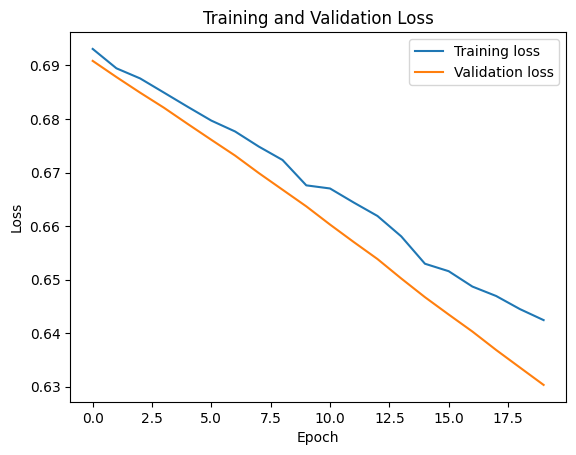

In [ ]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# get predictions for test data
with torch.no_grad():
    #preds = model(test_seq.to(device), test_mask.to(device))
    #preds = preds.detach().cpu().numpy()
    preds = model(test_seq, test_mask)

from sklearn.metrics import classification_report
pred = np.argmax(preds, axis=1)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       182
           1       0.52      0.49      0.50        84

    accuracy                           0.70       266
   macro avg       0.64      0.64      0.64       266
weighted avg       0.69      0.70      0.69       266



In [ ]:
pred

tensor([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1])

In [ ]:
# ubah text df dengan slang
df['teks'] = df['text'].apply(lambda x: changes(x, slangdict))

<ipython-input-90-56c18524bf9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teks'] = df['text'].apply(lambda x: changes(x, slangdict))


In [ ]:
# Melabeli data dengan model yang sudah di training
tokens_df = tokenizer.batch_encode_plus(
	df['teks'].tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)
df_seq = torch.tensor(tokens_df['input_ids'])
df_mask = torch.tensor(tokens_df['attention_mask'])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Perform predictions using the model
with torch.no_grad():
    preds = model(df_seq, df_mask)

# Convert predictions to labels
predicted_labels = torch.argmax(preds, dim=1).tolist()

# Store predicted labels in the DataFrame
df['label'] = predicted_labels

<ipython-input-94-d75f0c72edb2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = predicted_labels


In [ ]:
df['label'].value_counts()

label
0    6066
1    2984
Name: count, dtype: int64

In [ ]:
df['label'].head(10)

# Pre-processing 2

## Filtering Text

In [ ]:
import sys
if 'emoji' not in sys.modules:
    !pip install emoji -q

import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = '(' + '|'.join(re.escape(u) for u in emojis) + ')'
    return re.compile(pattern)

In [ ]:
import re, string

#Clean emojis from text
def strip_emoji(text):
    return re.sub(get_emoji_regexp(), r"", text) #remove emoji

# Remove emoji update
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'\
    text = re.sub(r'\d+', '', text) #remove number
    text = ' '.join([word for word in text.split() if len(word) > 1]) #make sure that text have a meaning
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
texts_new = []
for t in df.teks:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(remove_emoji(strip_emoji(t)))))))

In [ ]:
df['clean_text'] = texts_new

<ipython-input-119-d4c68f0ed822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = texts_new


In [ ]:
df.drop(columns=['score','length'], inplace=True)

<ipython-input-120-f0d1261fc8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['score','length'], inplace=True)


In [ ]:
df.isnull().sum()

userName      0
text          0
teks          0
label         0
clean_text    0
text_len      0
dtype: int64

## Subset data kurang dari 4 kata

In [ ]:
#fungsi untuk melihat banyaknya karakter pada teks
text_len = []
for text in df.clean_text:
    texts_len = len(text.split())
    text_len.append(texts_len)

In [ ]:
df['text_len'] = text_len

<ipython-input-123-5bfdd5f14fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = text_len


<ipython-input-124-b01829af33ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data = df[df['text_len']<10], palette='mako')


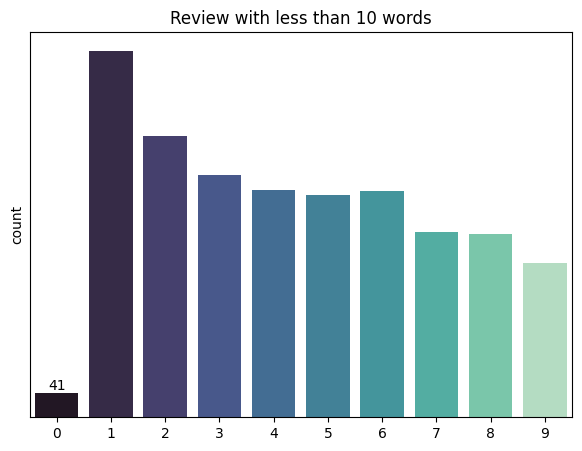

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Plot untuk mengetahui panjang dari karakter pada teks yang kurang dari 10
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data = df[df['text_len']<10], palette='mako')
plt.title('Review with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# Melihat berapa banyak jumlah row yang memiliki panjang karakter kurang dari 4
(df['text_len'] < 4).sum()

1519

In [ ]:
# Melihat isi row dengan teks kurang dari 4
df[df['text_len'] < 4].sort_values(by='text_len')[:60]

,userName,text,teks,label,clean_text,text_len
1708,Dini Fadilah,👍🏻,👍🏻,1,,0
7337,Dieyan Saya,𝘊𝘶𝘬𝘶𝘱 𝘮𝘦𝘮𝘶𝘢𝘴𝘬𝘢𝘯,𝘊𝘶𝘬𝘶𝘱 𝘮𝘦𝘮𝘶𝘢𝘴𝘬𝘢𝘯,1,,0
2330,Nhadya Apriani,👍,👍,1,,0
7324,R 5G,🤭,🤭,1,,0
6771,Abustan Batu,"v ,","v ,",1,,0
4703,juliadi musa,👍,👍,1,,0
5729,Aiu R'nie,😍,😍,1,,0
3285,Susy Lia,"𝚂𝚘 𝚏𝚊𝚛 𝚜𝚘 𝚐𝚘𝚘𝚍, 𝚝𝚙 𝚔𝚗𝚙 𝚝𝚎𝚛𝚔𝚊𝚍𝚊𝚗𝚐 𝚙𝚛𝚘𝚡𝚢 𝚝𝚍𝚔 𝚍𝚙𝚝...","𝚂𝚘 𝚏𝚊𝚛 𝚜𝚘 𝚐𝚘𝚘𝚍, 𝚝𝚙 𝚔𝚗𝚙 𝚝𝚎𝚛𝚔𝚊𝚍𝚊𝚗𝚐 𝚙𝚛𝚘𝚡𝚢 𝚝𝚍𝚔 𝚍𝚙𝚝...",1,,0
6800,Nova Pasaribu,👍,👍,1,,0
5523,Agoes Pramono,👍,👍,1,,0


In [ ]:
df_clean = df[df['text_len'] > 3]

In [ ]:
df_clean.sort_values(by='text_len')

,userName,text,teks,label,clean_text,text_len
0,yghnナンダ,tingkatkan terus mandiri semangat,tingkatkan terus mandiri semangat,0,tingkatkan terus mandiri semangat,4
2604,Redhata Rangkuti,great apps for ebanking,great apps for ebanking,1,great apps for ebanking,4
6585,Sujiman Arif,gk nyaman nich bos,tidak nyaman ini bos,0,tidak nyaman ini bos,4
2608,Petrus Roberto,tidak bisa update aplikasi,tidak bisa update aplikasi,0,tidak bisa update aplikasi,4
496,ine rania,mau transfer slalu gagal,mau transfer selalu gagal,0,mau transfer selalu gagal,4
...,...,...,...,...,...,...
8829,Tridiktya Hardani Putra,i'm the user of the blue livin' (previous vers...,i'm the user of the blue livin' (previous vers...,1,im the user of the blue livin previous version...,89
8305,Fenty Raf,beberapa kali sy sering kecewa aplikasi livin ...,beberapa kali saya sering kecewa aplikasi livi...,0,beberapa kali saya sering kecewa aplikasi livi...,91
628,Arifa Hijriani,"hi, please add feature ""update saldo"" on e-mon...","hi, please add feature ""update saldo"" on e-mon...",1,hi please add feature update saldo on emoney l...,91
3236,Diah Haydiko,suka bgt mudah skl instal nya bs mandiri ..br ...,suka sangat mudah skl instal nya bisa mandiri ...,0,suka sangat mudah skl instal nya bisa mandiri ...,92


In [ ]:
df_clean.to_csv('datareviewclean.csv', index = False)

In [ ]:
!gdown --id 1eamYpieD32LscSUws5viHHX_lKSJSEco

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eamYpieD32LscSUws5viHHX_lKSJSEco
To: /content/datareviewclean.csv
100% 2.28M/2.28M [00:00<00:00, 98.2MB/s]


In [ ]:
df_clean = pd.read_csv("datareviewclean.csv", index_col=False)

In [ ]:
df_clean.head()

,userName,text,teks,label,clean_text,text_len
0,yghnナンダ,tingkatkan terus mandiri semangat,tingkatkan terus mandiri semangat,0,tingkatkan terus mandiri semangat,4
2,Drg. Datu Permata,till now the only digital wallet that can be r...,till now the only digital wallet that belum be...,1,till now the only digital wallet that belum be...,55
3,ARC Kun,"kak, ini saya punya kendala. kendala saya adal...","kak, ini saya punya kendala. kendala saya adal...",0,kak ini saya punya kendala kendala saya adalah...,64
5,Ardi Bismillah,sebenarnya aplikasi ini sudah top lah tapi seb...,sebenarnya aplikasi ini sudah top lah tapi seb...,0,sebenarnya aplikasi ini sudah top lah tapi seb...,21
6,Alifka Ifka Maghfiroh,gimana sih biar terhubung sama cs mandiri tanp...,bagaimana sih biar terhubung sama cs mandiri t...,0,bagaimana sih biar terhubung sama cs mandiri t...,54


## Detect Language

In [ ]:
!pip install langdetect -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from langdetect import detect

# Fungsi untuk mendeteksi bahasa Inggris
def detect_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Mendeteksi bahasa Inggris
df_en = df_clean[df_clean['clean_text'].apply(detect_english)]

# Memisahkan data yang bukan bahasa Inggris
df_nen = df_clean[~df_clean['clean_text'].apply(detect_english)]

In [ ]:
print("Jumlah data bahasa Inggris:", df_en.shape[0])
print("Jumlah data dalam bahasa lain:", df_nen.shape[0])

Jumlah data bahasa Inggris: 1611
Jumlah data dalam bahasa lain: 5914


In [ ]:
df_nen.tail(20)

,userName,text,teks,label,clean_text,text_len
9024,Nadia Aulia Ghaisani,"setelah update, livin' logo kuning tidak dapat...","setelah update, livin' logo kuning tidak dapat...",0,setelah update livin logo kuning tidak dapat d...,36
9027,Sugemay Indra,"sangat mempermudah tp suering error, seperti s...","sangat mempermudah tapi suering error, seperti...",0,sangat mempermudah tapi suering error seperti ...,18
9028,sandi adiningrat,"tdk bisa transaksi, install ulang sdh, telp 14...","tidak bisa transaksi, install ulang sdh, telep...",0,tidak bisa transaksi install ulang sdh telepon...,33
9029,Agnes Marbun,knp ngk bisa log in ya padahal udh pernah biki...,kenapa tidak bisa log in iya padahal sudah per...,0,kenapa tidak bisa log in iya padahal sudah per...,20
9030,tati tati,kenapa tak bisa input pin atm di aplikasi. sel...,kenapa tidak bisa input pin atm di aplikasi. s...,0,kenapa tidak bisa input pin atm di aplikasi se...,15
9031,arizah mukhlishah,kenapa skr justru aplikasinya ga bs otomatis m...,kenapa sekarang justru aplikasinya tidak bisa ...,0,kenapa sekarang justru aplikasinya tidak bisa ...,30
9032,Andhika Bara,"gabisa masuk ke livin mandirinya, pas di pence...","tidak bisa masuk ke livin mandirinya, pas di p...",0,tidak bisa masuk ke livin mandirinya pas di pe...,13
9034,Didin Pertamina,buat nbanking y susah,buat nbanking ya susah,0,buat nbanking ya susah,4
9035,Nader Kabir,tidak ada paylater 😰😰👎 harganya sangat mahal 😰...,tidak ada paylater 😰😰👎 harganya sangat mahal 😰...,0,tidak ada paylater harganya sangat mahal,6
9036,Yusrizal Syah,sangat buruk tidak memudahkan malah menyusahka...,sangat buruk tidak memudahkan bahkan menyusahk...,0,sangat buruk tidak memudahkan bahkan menyusahk...,29


In [ ]:
df_nen['clean_text'].isnull().sum()

0

In [ ]:
df_nen['clean_text'] = df_nen['clean_text'].astype(str)

<ipython-input-135-3ffc8c929fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nen['clean_text'] = df_nen['clean_text'].astype(str)


In [ ]:
df_nen.dtypes

userName      object
text          object
teks          object
label          int64
clean_text    object
text_len       int64
dtype: object

## Data hasil translasi & Filtering

In [ ]:
import pandas as pd
import gdown
!gdown --id 1t3610BypFjDB4CHApudRFi3ACu_lYYFl #Data Hasil translasi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1t3610BypFjDB4CHApudRFi3ACu_lYYFl
To: /content/datatransl1.csv
100% 1.17M/1.17M [00:00<00:00, 103MB/s]


In [ ]:
dataset = pd.read_csv('datatransl1.csv', index_col=False)

In [ ]:
dataset.head()

,userName,score,text
0,Drg. Datu Permata,3,till now the only digital wallet that can be r...
1,aldino dwija,1,please fix the bug cant enter my birthday numb...
2,andieqa billysyah,5,the realisasi mobile banking you can imagine a...
3,Gilang Daryaatmaka,1,as long as cant get all my saved transfer list...
4,Naeni Basri,4,this is good for us


## Translation

In [ ]:
import sys
import time
if 'googletrans' not in sys.modules:
    !pip install googletrans==4.0.0-rc1 -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.7 MB/s eta 0:00:00


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
# Inisialisasi translator
translator = Translator()

# Terjemahkan teks yang bukan bahasa Inggris ke bahasa Inggris dengan penundaan 0.4 detik
translated_texts = []
for text in df_nen['clean_text'][3870:]:
    # Periksa apakah teks adalah string
    if isinstance(text, str):
        translated_text = translator.translate(text, dest='en').text
    else:
        # Jika bukan string, gunakan teks asli
        translated_text = text
    translated_texts.append(translated_text)
    time.sleep(0.4)  # Penundaan 0.4 detik antara setiap permintaan translasi

# Tambahkan teks terjemahan ke dataframe
df_nen['translated'] = translated_texts


In [ ]:
trans.reset_index(drop=True, inplace=True)

# Reset indeks untuk df_en
df_en.reset_index(drop=True, inplace=True)

# Reset indeks untuk df_nen
df_nen.reset_index(drop=True, inplace=True)

In [ ]:
df_nen['translated'] = trans

<ipython-input-159-cec9dc73a84b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nen['translated'] = trans


In [ ]:
df_nen.shape

(5914, 7)

In [ ]:
df_en.shape

(1611, 6)

In [ ]:
df_nen.drop(columns=['clean_text'], inplace=True)
df_nen.rename(columns= {'translated':'clean_text'}, inplace=True)

<ipython-input-163-538749f2b596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nen.drop(columns=['clean_text'], inplace=True)
<ipython-input-163-538749f2b596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nen.rename(columns= {'translated':'clean_text'}, inplace=True)


In [ ]:
df_nen

,userName,text,teks,label,text_len,clean_text
0,yghnナンダ,tingkatkan terus mandiri semangat,tingkatkan terus mandiri semangat,0,4,Increase the SPIRIT MANDIRI
1,ARC Kun,"kak, ini saya punya kendala. kendala saya adal...","kak, ini saya punya kendala. kendala saya adal...",0,64,"Sis, I have an obstacle, my obstacle is that I..."
2,Ardi Bismillah,sebenarnya aplikasi ini sudah top lah tapi seb...,sebenarnya aplikasi ini sudah top lah tapi seb...,0,21,"Actually, this application is top, but as a su..."
3,Alifka Ifka Maghfiroh,gimana sih biar terhubung sama cs mandiri tanp...,bagaimana sih biar terhubung sama cs mandiri t...,0,54,how the heck to connect with cs mandiri withou...
4,Ci' Am,kok saya gak bisa login ya,kok saya tidak bisa login iya,0,6,how come I can't log in yes
...,...,...,...,...,...,...
5909,Vivo Y12s,jangan update mulu napa bos,jangan update terus kenapa bos,0,5,don't keep updating why boss
5910,Cecep Saipul Rahman,ga canggih. payah. sering offline. apalagi mal...,tidak canggih. payah. sering offline. apalagi ...,0,31,"Not sophisticated, often offline, especially a..."
5911,Bagus Sonara,tidak bisa dibuka aplikasi ini hanya menunjuka...,tidak bisa dibuka aplikasi ini hanya menunjuka...,0,17,This application cannot be opened only shows t...
5912,Deppi Ochtari,kenapa tiap malem selalu error sih? padahal su...,kenapa tiap malam selalu error sih? padahal su...,0,23,"Why every night always error, even though I li..."


In [ ]:
# Gabungkan data
df_combi = pd.concat([df_en, df_nen])

In [ ]:
df_combi.shape

(7525, 6)

In [ ]:
df_combi.head()

,userName,text,teks,label,clean_text,text_len
0,Drg. Datu Permata,till now the only digital wallet that can be r...,till now the only digital wallet that belum be...,1,till now the only digital wallet that belum be...,55
1,aldino dwija,"please fix the bug, i can't enter my birthday ...","please fix the bug, i can't enter my birthday ...",1,please fix the bug cant enter my birthday numb...,13
2,andieqa billysyah,the realisasi mobile banking. you can imagine ...,the realisasi mobile banking. you belum imagin...,1,the realisasi mobile banking you belum imagine...,15
3,Gilang Daryaatmaka,as long as i cant get all my saved transfer li...,as long as i cant get all my saved transfer li...,1,as long as cant get all my saved transfer list...,48
4,Naeni Basri,this is good for us,this is good for us,1,this is good for us,5


In [ ]:
df_combi.reset_index(drop=True, inplace=True)

In [ ]:
# Filter nilai-nilai yang bukan string dan konversi menjadi string
df_combi['clean_text'] = df_combi['clean_text'].apply(lambda x: str(x) if isinstance(x, str) else None)

# Buang baris yang memiliki nilai non-string
df_combi = df_combi.dropna(subset=['clean_text'])

# Reset indeks setelah penghapusan nilai non-string
df_combi.reset_index(drop=True, inplace=True)


In [ ]:
df_combi.shape

(7525, 6)

In [ ]:
df_combi.head()

,userName,text,teks,label,clean_text,text_len
0,Drg. Datu Permata,till now the only digital wallet that can be r...,till now the only digital wallet that belum be...,1,till now the only digital wallet that belum be...,55
1,aldino dwija,"please fix the bug, i can't enter my birthday ...","please fix the bug, i can't enter my birthday ...",1,please fix the bug cant enter my birthday numb...,13
2,andieqa billysyah,the realisasi mobile banking. you can imagine ...,the realisasi mobile banking. you belum imagin...,1,the realisasi mobile banking you belum imagine...,15
3,Gilang Daryaatmaka,as long as i cant get all my saved transfer li...,as long as i cant get all my saved transfer li...,1,as long as cant get all my saved transfer list...,48
4,Naeni Basri,this is good for us,this is good for us,1,this is good for us,5


In [ ]:
df_combi.drop(columns=['text', "teks", 'text_len'], inplace=True)
df_combi.rename(columns= {'label':'sentiment'}, inplace=True)
df_combi.rename(columns= {'clean_text':'text'}, inplace=True)

In [ ]:
df_combi.head()

,userName,sentiment,text
0,Drg. Datu Permata,1,till now the only digital wallet that belum be...
1,aldino dwija,1,please fix the bug cant enter my birthday numb...
2,andieqa billysyah,1,the realisasi mobile banking you belum imagine...
3,Gilang Daryaatmaka,1,as long as cant get all my saved transfer list...
4,Naeni Basri,1,this is good for us


In [ ]:
df_combi.to_csv('cleancombi.csv', index=False)

## Load dataset yang sudah diterjemahkan

In [ ]:
!gdown --id 1t3610BypFjDB4CHApudRFi3ACu_lYYFl #Data translated

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1t3610BypFjDB4CHApudRFi3ACu_lYYFl
To: /content/datatransl1.csv
100% 1.17M/1.17M [00:00<00:00, 115MB/s]


In [ ]:
dataset=pd.read_csv('datatransl1.csv', index_col=False)

## Stopwords

In [ ]:
dataset = df_combi

NameError: name 'df_combi' is not defined

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['text'] = dataset['text'].apply(remove_stopwords)

In [ ]:
dataset.head()

,userName,sentiment,text
0,Drg. Datu Permata,1,till digital wallet belum refill obe connected...
1,aldino dwija,1,please fix bug cant enter birthday number firs...
2,andieqa billysyah,1,realisasi mobile banking belum imagine need li...
3,Gilang Daryaatmaka,1,long cant get saved transfer list saved paymen...
4,Naeni Basri,1,good us


#BERT EFCM

## Most Common

In [ ]:
from collections import Counter

In [ ]:
coment = ' '.join(dataset['text'])

In [ ]:
# Memisahkan kata-kata
words = coment.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Mengambil kata yang paling sering muncul
most_common_word = word_counts.most_common(1)[0][0]

# Ambil 20 kata teratas
top_20_words = word_counts.most_common(20)

In [ ]:
print("Kata yang paling sering muncul dalam review adalah:", most_common_word)

Kata yang paling sering muncul dalam review adalah: application


In [ ]:
# Tampilkan list frekuensi kata terbanyak
print("List frekuensi kata terbanyak:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

List frekuensi kata terbanyak:
application: 1955
even: 1515
can't: 1173
please: 1114
Livin: 1105
time: 1008
want: 978
app: 959
use: 884
update: 863
though: 791
transaction: 755
transfer: 704
often: 684
Mandiri: 677
good: 666
still: 644
always: 642
account: 622
blue: 613


In [ ]:
# Pisahkan komentar positif dan negatif
komentar_positif = dataset[dataset['sentiment'] == 1]['text']
komentar_negatif = dataset[dataset['sentiment'] == 0]['text']

kata_positif = Counter()
komentar_positif.apply(lambda x: kata_positif.update(x.split()))

kata_negatif = Counter()
komentar_negatif.apply(lambda x: kata_negatif.update(x.split()))

# mengetahui 10 kata yang paling sering digunakan
top_kata_positif = kata_positif.most_common(10)
top_kata_negatif = kata_negatif.most_common(10)

top_kata_positif_df = pd.DataFrame(top_kata_positif, columns=['Kata','Frekuensi'])
top_kata_negatif_df = pd.DataFrame(top_kata_negatif, columns=['Kata','Frekuensi'])

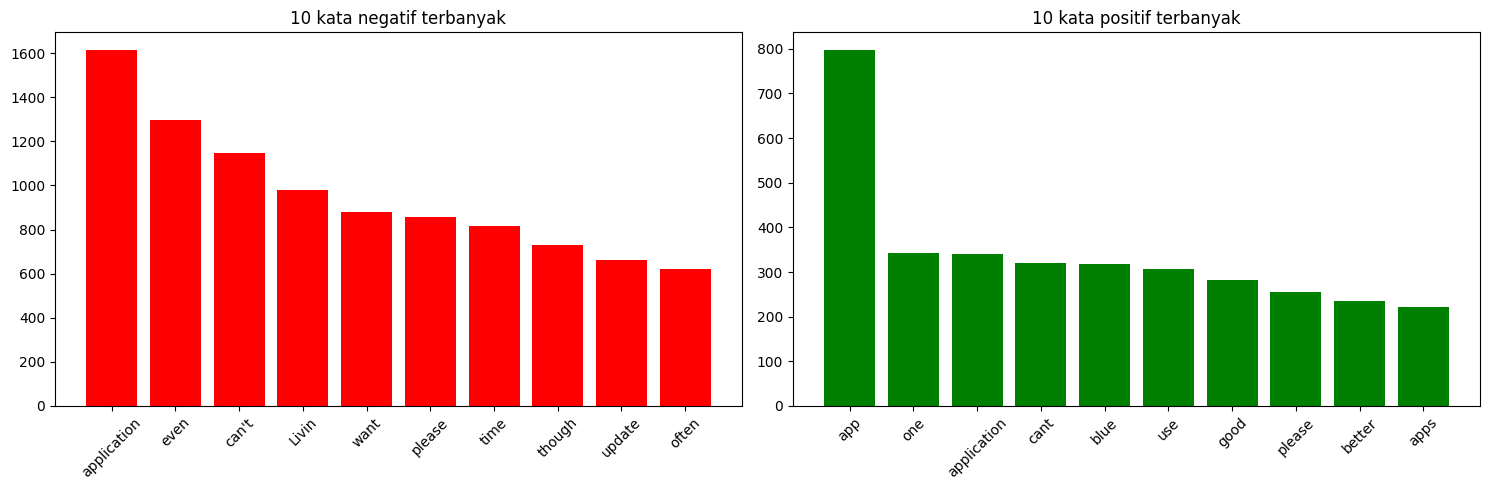

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(top_kata_negatif_df['Kata'], top_kata_negatif_df['Frekuensi'], color='red')
plt.title('10 kata negatif terbanyak')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_kata_positif_df['Kata'], top_kata_positif_df['Frekuensi'], color='green')
plt.title('10 kata positif terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## WordCloud

In [ ]:
from wordcloud import WordCloud

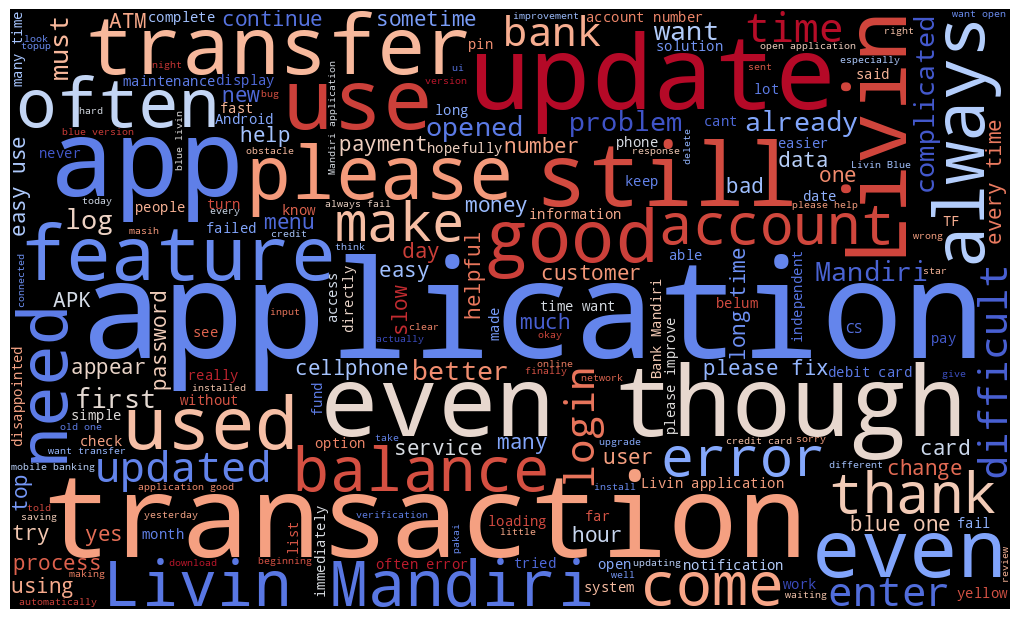

In [ ]:
all_comments = ' '.join(dataset['text'])
# Buat wordcloud untuk komentar positif
wordcloud_all = WordCloud(width = 1000, height = 600,
                background_color ='black',
                colormap = 'coolwarm_r',
                stopwords = None,
                min_font_size = 10).generate(all_comments)

# Tampilkan wordcloud untuk komentar positif
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud_all)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

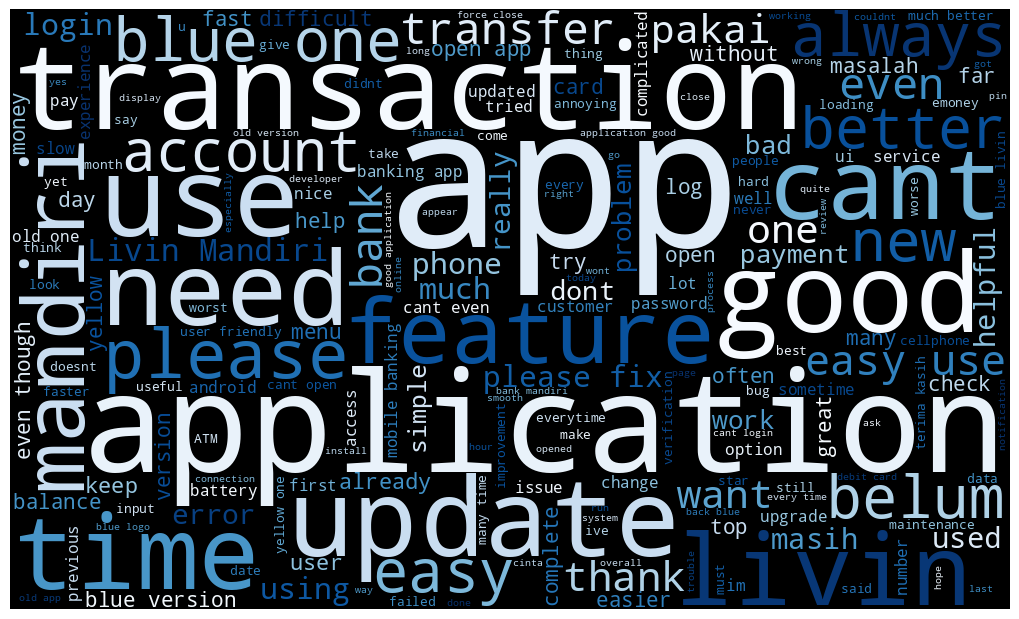

In [ ]:
# Gabungkan semua komentar positif menjadi satu string
all_positive_comments = ' '.join(komentar_positif)

# Buat wordcloud untuk komentar positif
wordcloud_positive = WordCloud(width = 1000, height = 600,
                background_color ='black',
                colormap = 'Blues_r',
                stopwords = None,
                min_font_size = 10).generate(all_positive_comments)

# Tampilkan wordcloud untuk komentar positif
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

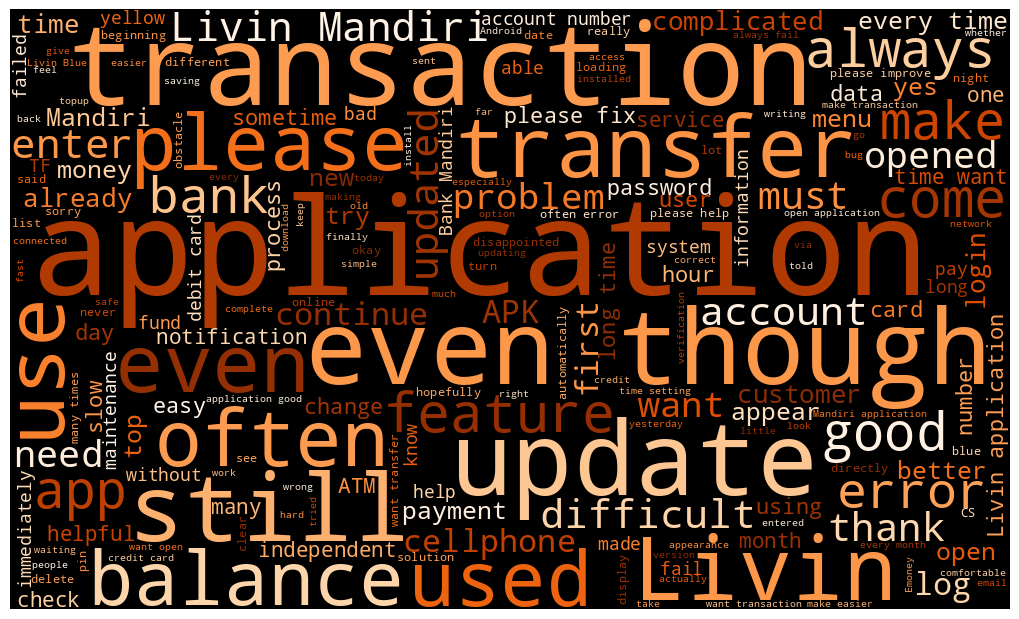

In [ ]:
# Gabungkan semua komentar negatif menjadi satu string
all_negative_comments = ' '.join(komentar_negatif)

# Buat wordcloud untuk komentar negatif
wordcloud_negative = WordCloud(width = 1000, height = 600,
                background_color ='black',
                colormap = 'Oranges_r',
                stopwords = None,
                min_font_size = 10).generate(all_negative_comments)

# Tampilkan wordcloud untuk komentar negatif
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Melihat kata-kata unik dari tiap sentiment
# Memisahkan kata-kata yang hanya muncul pada tweet positif
unique_positive_words = set(all_positive_comments.split()) - set(all_negative_comments.split())

# Memisahkan kata-kata yang hanya muncul pada tweet negatif
unique_negative_words = set(all_negative_comments.split()) - set(all_positive_comments.split())

In [ ]:
uniquepos = ' '.join(unique_positive_words)
uniqueneg = ' '.join(unique_negative_words)

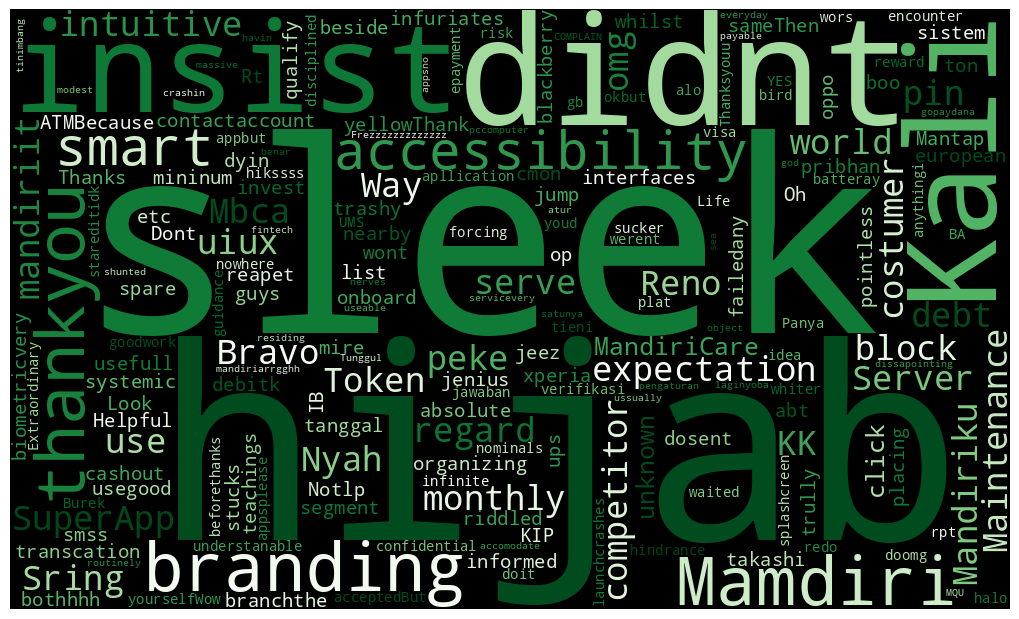

In [ ]:
# Buat wordcloud untuk komentar positif unik
wordcloud_uniquepos = WordCloud(width = 1000, height = 600,
                background_color ='black',
                colormap = 'Greens_r',
                stopwords = None,
                min_font_size = 10).generate(uniquepos)

# Tampilkan wordcloud untuk komentar negatif
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud_uniquepos)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

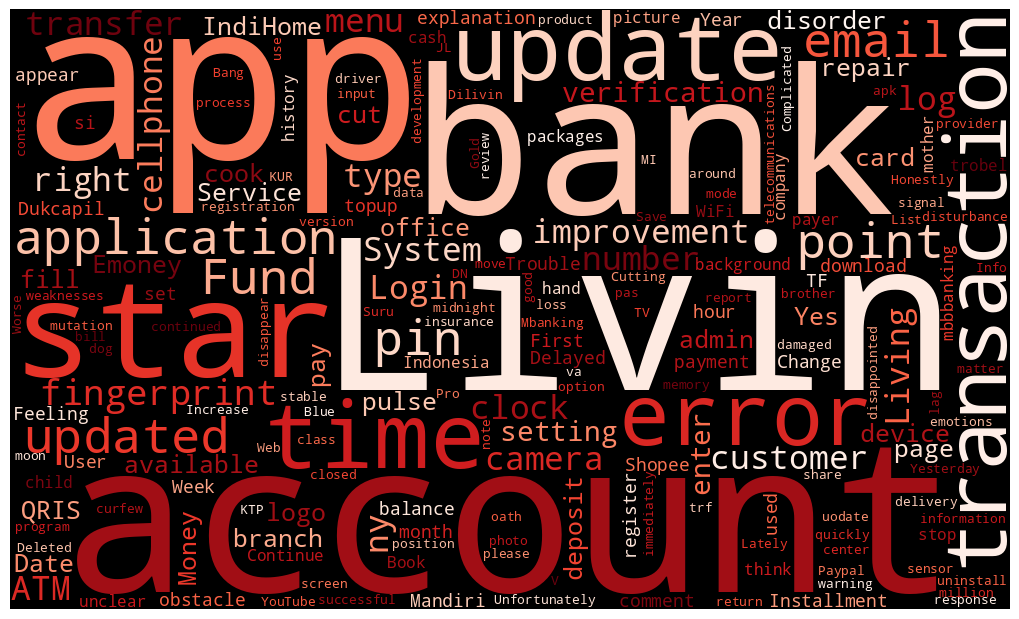

In [ ]:
# Buat wordcloud untuk komentar negatif unik
wordcloud_uniqueneg = WordCloud(width = 1000, height = 600,
                background_color ='black',
                colormap = 'Reds_r',
                stopwords = None,
                min_font_size = 10).generate(uniqueneg)

# Tampilkan wordcloud untuk komentar negatif
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud_uniqueneg)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Topik Deteksi BERT-EFCM

In [ ]:
from transformers import AutoTokenizer, TFAutoModel

In [ ]:
# memanggil model dan tokenizer BERT
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
bert_model = TFAutoModel.from_pretrained("bert-base-multilingual-cased", trainable=False)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# tokenisasi data
def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 128,
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask
    return tokenID

# mengambil hasil tokenisasi pada semua data
def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        #print(teks)
        token, mask = tokenisasi(str(teks))
        tokenID.append(token)
        input_mask.append(mask)

    return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 128),
            np.asarray(input_mask, dtype=np.int32).reshape(-1, 128)]

In [ ]:
# Proses data per iterasi
total_data = dataset.shape[0]  # Jumlah total data
batch_size = 256 # Jumlah data per iterasi
num_iterations = int(np.ceil(total_data / batch_size))  # Jumlah iterasi yang diperlukan

output = []  # Variabel untuk menyimpan hasil

for i in range(num_iterations):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, total_data)
    batch_data = dataset['text'].iloc[start_idx:end_idx].to_numpy()

    seq_words = create_input(batch_data)
    bert_emb = bert_model(seq_words)[1]
    output.append(bert_emb)

output = np.concatenate(output, axis=0)

output_shape = output.shape
print("Output shape:", output_shape)

Output shape: (7525, 768)


In [ ]:
## Model EFCM - Reduksi Dimensi
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5)
data = svd.fit_transform(output)

print(data.shape)

(7525, 5)


## Detection

In [ ]:
## Model EFCM - Clustering
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, "/content/fcmeans")
from fcmeans import fcmeans

m =1.1
n_topics = 4
initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
cluster_membership = np.argmax(u, axis=0)

print(cluster_membership.shape)

(7525,)


In [ ]:
### Topic Interpretation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#### Class Based TFIDF (C-TFIDF) Functions
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_words_per_topic(tf_idf, count, docs_per_topic, n = 10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    top_words = []
    for i in range(len(labels)):
      top_words.append([words[j] for j in indices [i]][::-1])
    return top_words

#### Topic Representation
docs = pd.DataFrame(list(dataset["text"]), columns=["Doc"])
docs['Topic'] = cluster_membership
docs['Doc_ID'] = range(len(docs))
docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)
print(top_words)

[['even', 'application', 'though', 'often', 'transactions', 'livin', 'cannot', 'transaction', 'time', 'still'], ['application', 'can', 'livin', 'please', 'even', 'want', 'time', 'use', 'update', 'transaction'], ['livin', 'update', 'app', 'even', 'mandiri', 'belum', 'it', 'back', 'tried', 'though'], ['app', 'mandiri', 'livin', 'update', 'please', 'want', 'account', 'cant', 'can', 'open']]


In [ ]:
top_words

[['even',
  'application',
  'though',
  'often',
  'transactions',
  'livin',
  'cannot',
  'transaction',
  'time',
  'still'],
 ['application',
  'can',
  'livin',
  'please',
  'even',
  'want',
  'time',
  'use',
  'update',
  'transaction'],
 ['livin',
  'update',
  'app',
  'even',
  'mandiri',
  'belum',
  'it',
  'back',
  'tried',
  'though'],
 ['app',
  'mandiri',
  'livin',
  'update',
  'please',
  'want',
  'account',
  'cant',
  'can',
  'open']]

In [ ]:
### Topic Coherence
import gensim
from itertools import combinations
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Memuat Model Word2Vec
w2v_model = gensim.models.Word2Vec.load("/content/w2v-model.bin")

### Fungsi Menghitung Coherence
def calculate_coherence(w2v_model, term_rankings):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2):
            if pair[0] in w2v_model.wv.key_to_index and pair[1] in w2v_model.wv.key_to_index:
                pair_scores.append(abs(w2v_model.wv.similarity(pair[0], pair[1])))
            else:
                pair_scores.append(0)

        # get the mean for all pairs in this topic
        if pair_scores:
            topic_score = sum(pair_scores) / len(pair_scores)
            overall_coherence += topic_score

    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


### Menentukan Nilai Coherence dari Topik
print("Nilai coherence diperoleh: ", calculate_coherence(w2v_model, top_words))

Nilai coherence diperoleh:  0.2924357265440954


In [ ]:
## Parameter Tuning
### Jumlah Topik Optimal
### Cari N topik terbaik
import pandas as pd

num_topics = []
coherences = []
for n_topics in range(3,11,1):
    print("The number of topics is " + str(n_topics))

    coherence_sim = []
    for i in range(1,3):
        print("The simulation " + str(i))

        #topic detection
        m = 1.1
        initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
        cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
        cluster_membership = np.argmax(u, axis=0)

        docs = pd.DataFrame(list(dataset["text"]), columns=["Doc"])
        docs['Topic'] = cluster_membership
        docs['Doc_ID'] = range(len(docs))
        docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

        tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
        top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)

        coherence_sim.append(calculate_coherence(w2v_model, top_words))
        print('Coherence value : ',coherence_sim[i-1])

    num_topics.append(n_topics)
    coherences.append(coherence_sim)

The number of topics is 3
The simulation 1
Coherence value :  0.30648410781114194
The simulation 2
Coherence value :  0.30648410781114194
The number of topics is 4
The simulation 1
Coherence value :  0.308208890274788
The simulation 2
Coherence value :  0.308208890274788
The number of topics is 5
The simulation 1
Coherence value :  0.30257862879170316
The simulation 2
Coherence value :  0.3025786287917031
The number of topics is 6
The simulation 1
Coherence value :  0.30494115595464355
The simulation 2
Coherence value :  0.30494115595464355
The number of topics is 7
The simulation 1
Coherence value :  0.268651698018232
The simulation 2
Coherence value :  0.2909075783329114
The number of topics is 8
The simulation 1
Coherence value :  0.2846081069696488
The simulation 2
Coherence value :  0.2846081069696488
The number of topics is 9
The simulation 1
Coherence value :  0.2880673979397541
The simulation 2
Coherence value :  0.2895187784285273
The number of topics is 10
The simulation 1
Co

In [ ]:
best_num_topics = num_topics[np.argmax(np.mean(coherences, axis=1))]
best_coherence = np.max(np.mean(coherences, axis=1))

print("Best number of topics:", best_num_topics)
print("Best coherence:", best_coherence)

Best number of topics: 4
Best coherence: 0.308208890274788


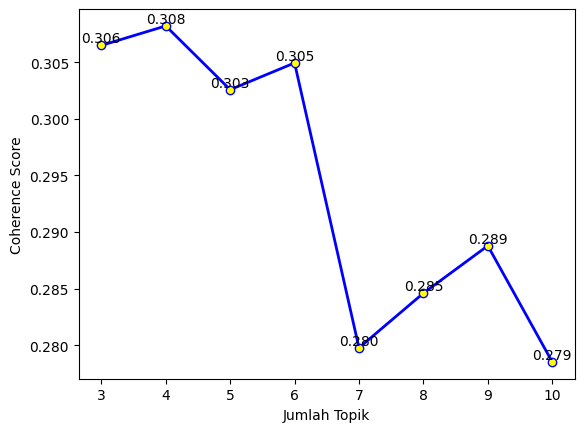

In [ ]:
# Membuat plot perbandingan nilai coherence pada setiap jumlah topik
import matplotlib.pyplot as plt

# Menghitung rata-rata nilai coherence
coherence_avg = [np.mean(sim) for sim in coherences]

# Membuat line plot
plt.plot(num_topics, coherence_avg, color='b', marker='o',
         markerfacecolor='yellow', linewidth=2)
plt.xlabel('Jumlah Topik')
plt.ylabel('Coherence Score')

# Mengatur penanda sumbu x agar hanya menampilkan bilangan bulat
plt.xticks(np.arange(min(num_topics), max(num_topics)+1, 1))

# Menambahkan label nilai coherence pada setiap titik
for i, coherence in enumerate(coherence_avg):
    plt.text(num_topics[i], coherence, f'{coherence:.3f}', ha='center',
             va='bottom')

plt.show()

Text(0, 0.5, 'Coherence')

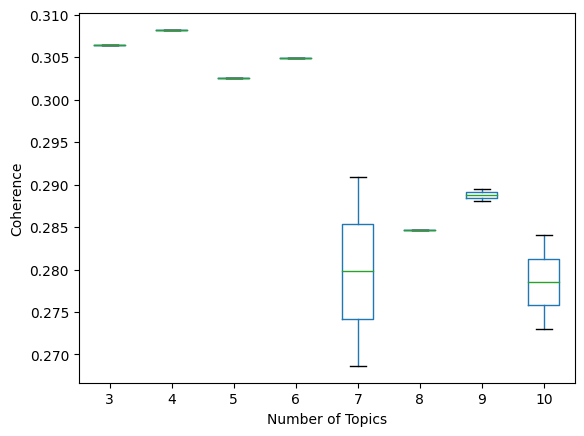

In [ ]:
### Visualisasi
df = pd.DataFrame.from_records(coherences).T
df.columns = num_topics
boxplot = df.boxplot(grid=False)
boxplot.set_xlabel("Number of Topics")
boxplot.set_ylabel("Coherence")

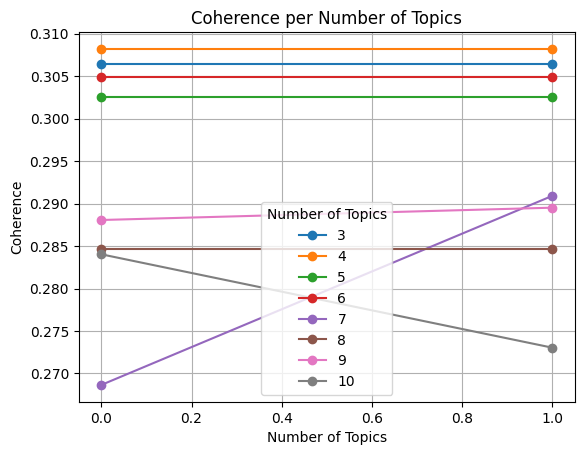

In [ ]:
### Visualisasi
df = pd.DataFrame.from_records(coherences).T
df.columns = num_topics
plt.plot(df, marker='o')  # Gunakan marker 'o' untuk setiap titik
plt.xlabel("Number of Topics")
plt.ylabel("Coherence")
plt.title("Coherence per Number of Topics")

# Tampilkan grid
plt.grid(True)

# Tampilkan plot
plt.legend(num_topics, title="Number of Topics")
plt.show()

In [ ]:
dataset.head()

,userName,sentiment,text
0,Drg. Datu Permata,1,till digital wallet belum refill obe connected...
1,aldino dwija,1,please fix bug cant enter birthday number firs...
2,andieqa billysyah,1,realisasi mobile banking belum imagine need li...
3,Gilang Daryaatmaka,1,long cant get saved transfer list saved paymen...
4,Naeni Basri,1,good us


In [ ]:
docs.Topic.unique()

array([2, 1, 0, 3])

In [ ]:
# Pendeteksian Topik

m =1.1
n_topics = 4
initkm = KMeans(n_clusters=n_topics, n_init=1).fit(data)
cntr, u = fcmeans(data.T, n_topics, m, error=0.0001, maxiter=200, init=initkm.cluster_centers_.T)
cluster_membership = np.argmax(u, axis=0)

#### Class Based TFIDF (C-TFIDF) Functions
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_words_per_topic(tf_idf, count, docs_per_topic, n = 10):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    top_words = []
    for i in range(len(labels)):
      top_words.append([words[j] for j in indices [i]][::-1])
    return top_words

#### Representasi topik
docs = pd.DataFrame(list(dataset["text"]), columns=["Doc"])
docs['Topic'] = cluster_membership
docs['Doc_ID'] = range(len(docs))
docs_per_topic = docs.dropna(subset=['Doc']).groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))
top_words = extract_top_words_per_topic(tf_idf, count, docs_per_topic, 10)
print(top_words)

[['even', 'application', 'though', 'often', 'transactions', 'livin', 'cannot', 'transaction', 'time', 'still'], ['application', 'can', 'livin', 'please', 'even', 'want', 'time', 'use', 'update', 'transaction'], ['app', 'mandiri', 'livin', 'update', 'please', 'want', 'account', 'cant', 'can', 'open'], ['livin', 'update', 'app', 'even', 'mandiri', 'belum', 'it', 'back', 'tried', 'though']]


In [ ]:
top_words

[['even',
  'application',
  'though',
  'often',
  'transactions',
  'livin',
  'cannot',
  'transaction',
  'time',
  'still'],
 ['application',
  'can',
  'livin',
  'please',
  'even',
  'want',
  'time',
  'use',
  'update',
  'transaction'],
 ['app',
  'mandiri',
  'livin',
  'update',
  'please',
  'want',
  'account',
  'cant',
  'can',
  'open'],
 ['livin',
  'update',
  'app',
  'even',
  'mandiri',
  'belum',
  'it',
  'back',
  'tried',
  'though']]

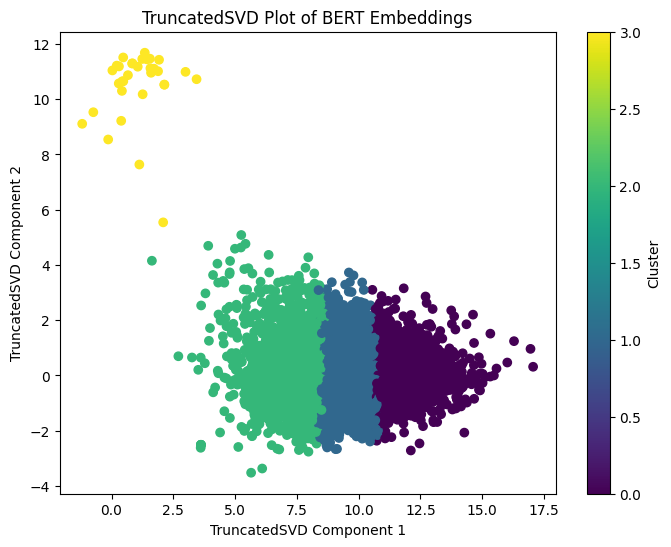

In [ ]:
import matplotlib.pyplot as plt

# Plot hasil menggunakan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 2], c=cluster_membership, cmap='viridis')
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.title('TruncatedSVD Plot of BERT Embeddings')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
docs

,Doc,Topic,Doc_ID
0,till digital wallet belum refill obe connected...,2,0
1,please fix bug cant enter birthday number firs...,2,1
2,realisasi mobile banking belum imagine need li...,2,2
3,long cant get saved transfer list saved paymen...,2,3
4,good us,2,4
...,...,...,...
7520,keep updating boss,1,7520
7521,"sophisticated, often offline, especially night...",0,7521
7522,application cannot opened shows logo exit Redm...,1,7522
7523,"every night always error, even though like tra...",1,7523


In [ ]:
docs['sentiment'] = dataset['sentiment']

In [ ]:
docs.head()

,Doc,Topic,Doc_ID,sentiment
0,till digital wallet belum refill obe connected...,2,0,1
1,please fix bug cant enter birthday number firs...,2,1,1
2,realisasi mobile banking belum imagine need li...,2,2,1
3,long cant get saved transfer list saved paymen...,2,3,1
4,good us,2,4,1


In [ ]:
docs.Topic.unique()

array([2, 1, 0, 3])

In [ ]:
dftopic1 = docs[docs['Topic'] == 0]
dftopic2 = docs[docs['Topic'] == 1]
dftopic3 = docs[docs['Topic'] == 2]
dftopic4 = docs[docs['Topic'] == 3]

In [ ]:
dftopic1.sentiment.value_counts()

sentiment
0    1519
1     295
Name: count, dtype: int64

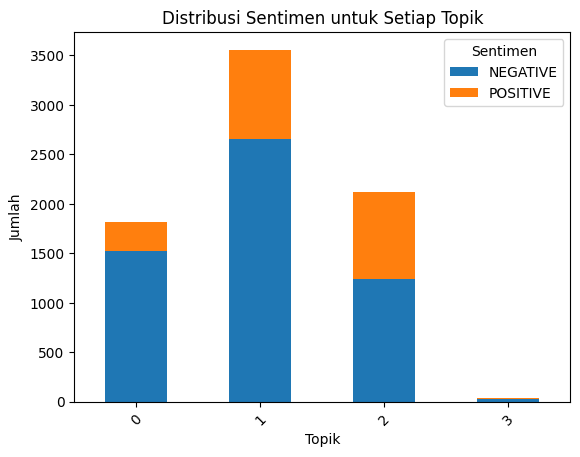

In [ ]:
import matplotlib.pyplot as plt

# Memetakan nilai sentimen
docs['sentiment'] = docs['sentiment'].map({0: 'NEGATIVE', 1: 'POSITIVE'})

# Kelompokkan data berdasarkan topik dan hitung jumlah sentimen positif dan negatif untuk setiap topik
sentiment_counts = docs.groupby(['Topic', 'sentiment']).size().unstack(fill_value=0)

# Plot distribusi sentimen untuk setiap topik
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Distribusi Sentimen untuk Setiap Topik')
plt.xlabel('Topik')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Sentimen')
plt.show()

In [ ]:
docs.head()

,Doc,Topic,Doc_ID,sentiment
0,till digital wallet belum refill obe connected...,2,0,POSITIVE
1,please fix bug cant enter birthday number firs...,2,1,POSITIVE
2,realisasi mobile banking belum imagine need li...,2,2,POSITIVE
3,long cant get saved transfer list saved paymen...,2,3,POSITIVE
4,good us,2,4,POSITIVE


In [ ]:
print("all done")

all done
